In [2]:
# Connect to your google drive
# [Do not modified this code]
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Download ImageBind
# [Do not modified this code]
%mkdir -p /content/drive/MyDrive/AI_HW1
%cd /content/drive/MyDrive/AI_HW1
!git clone https://github.com/facebookresearch/ImageBind.git

/content/drive/MyDrive/AI_HW1
fatal: destination path 'ImageBind' already exists and is not an empty directory.


In [4]:
# Build Environment
# [Do not modified this code]
%cd ./ImageBind
!pip install torch==2.0.1
!pip install .

/content/drive/MyDrive/AI_HW1/ImageBind
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 8.5 MB/s eta 0:00:00
   

In [5]:
# Load Model
# [Do not modify this code]

%cd /content/drive/MyDrive/AI_HW1/ImageBind

from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

/content/drive/MyDrive/AI_HW1/ImageBind


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [6]:
# Sample Code
text_list=["A dog", "A car", "A bird"]
image_paths=[".assets/dog_image.jpg", ".assets/car_image.jpg", ".assets/bird_image.jpg"]
audio_paths=[".assets/dog_audio.wav", ".assets/car_audio.wav", ".assets/bird_audio.wav"]

inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
    ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

print(
    "Vision x Text: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Audio x Text: ",
    torch.softmax(embeddings[ModalityType.AUDIO] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Vision x Audio: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.AUDIO].T, dim=-1),
)

# Expected output:
#
# Vision x Text:
# tensor([[9.9761e-01, 2.3694e-03, 1.8612e-05],
#         [3.3836e-05, 9.9994e-01, 2.4118e-05],
#         [4.7997e-05, 1.3496e-02, 9.8646e-01]])
#
# Audio x Text:
# tensor([[1., 0., 0.],
#         [0., 1., 0.],
#         [0., 0., 1.]])
#
# Vision x Audio:
# tensor([[0.8070, 0.1088, 0.0842],
#         [0.1036, 0.7884, 0.1079],
#         [0.0018, 0.0022, 0.9960]])

Vision x Text:  tensor([[9.8360e-01, 1.6274e-02, 1.2784e-04],
        [4.6024e-06, 9.9997e-01, 2.4119e-05],
        [1.3127e-05, 1.3497e-02, 9.8649e-01]], device='cuda:0')
Audio x Text:  tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')
Vision x Audio:  tensor([[0.8070, 0.1088, 0.0842],
        [0.1036, 0.7884, 0.1079],
        [0.0018, 0.0022, 0.9960]], device='cuda:0')


## **1-1. Build 3 x 3 matrices for the images to their texts: inner product (5%), softmax of inner product (5%), and consine similarity (5%).**

In [7]:
# Use the embeddings generated in the Sample Code

import pandas as pd

def build_dot_product_matrix(embeddings):
  # TODO: Refer to the Sample Code, build 3*3 matrices (inner product, softmax of inner product)
  result_inner_product = embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T
  result_softmax_matrix = torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1)
  return result_inner_product, result_softmax_matrix

inner_product_matrix, softmax_matrix = build_dot_product_matrix(embeddings) # The embedding generated above

row_labels = ["Dog", "Car", "Bird"]
column_labels = ["Dog", "Car", "Bird"]

inner_product_pd = pd.DataFrame(inner_product_matrix.cpu().numpy(), index=row_labels, columns=column_labels)
softmax_matrix_pd = pd.DataFrame(softmax_matrix.cpu().numpy(), index=row_labels, columns=column_labels)

print("Inner Product Matrix:")
print(inner_product_pd)

print("Softmax Matrix:")
print(softmax_matrix_pd)

Inner Product Matrix:
            Dog        Car       Bird
Dog   21.722372  17.620707  12.774158
Car   10.637737  22.926634  12.294155
Bird  12.335422  19.270958  23.562677
Softmax Matrix:
           Dog       Car      Bird
Dog   0.983598  0.016274  0.000128
Car   0.000005  0.999971  0.000024
Bird  0.000013  0.013497  0.986490


In [8]:
# Use cosine_similarity in sklearn to process the embeddings

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def build_dot_cosine_matrix(embeddings):
  #  TODO: Refer to the Sample Code, build 3*3 matrixes (cosine similarity)
  result_cosine_matrix = cosine_similarity(embeddings[ModalityType.VISION].cpu(), embeddings[ModalityType.TEXT].cpu())
  return result_cosine_matrix

cosine_matrix = build_dot_cosine_matrix(embeddings)

row_labels = ["Dog", "Car", "Bird"]
column_labels = ["Dog", "Car", "Bird"]

cosine_product_pd = pd.DataFrame(cosine_matrix, index=row_labels, columns=column_labels)

print("Cosine Product Matrix:")
print(cosine_product_pd)


Cosine Product Matrix:
           Dog       Car      Bird
Dog   0.217224  0.176207  0.127742
Car   0.106377  0.229266  0.122942
Bird  0.123354  0.192710  0.235627


## **1-2. Explore the differences within and between these three matrices and describe two of your observations in detail. (5%)**

### 1-2. My Answer:
Inner Product Matrix:

The dot product value between the Bird image and the Bird text is the highest(23.56), which represents a larger similarity between them.
Also, we can find that both Dog-Dog and Car-Car dot product value is higher than other in the same row.
Softmax Matrix:

Compare with the dot matrix product, the Softmax Matrix widened the gap between the values in the matrix
Cosine Similarity Matrix:

The Cosine Similarity measures how similar two vectors are by observing the cosine angle between them. This helps us understand the the relationships between embedding vectors and identify similar pairs.

####(1)Normalization Effects (Inner Product vs. Cosine Similarity):
As we can see, the cosine similarity matrix normalizes the scores, focusing on the angles between vectors rather than their magnitudes. This results in values between -1 and 1, offering a standardized way to compare the similarity regardless of the vector lengths. For example, the "Dog" to "Dog" cosine similarity (0.217224) is relatively low compared to the inner product (21.722372), indicating normalization affects the similarity evaluation.

####(2)Softmax Emphasis on the Most Similar Pair (Inner Product vs. Softmax):
The softmax matrix, derived from the inner product scores, transforms these values into a probability distribution across each row. The highest inner product score within a row is significantly emphasized, and others are minimized. For example, the "Car" to "Car" pair in the softmax matrix is 0.999971, almost treating it as a definitive match.


## **1-3. Why do we need to perform softmax after calculating inner product? (5%)**

### 1-3. My Answer:

Softmax converts raw similarity scores (from the inner product) into a probability distribution. This is important because the softmax matrix will normalize the matrix, allowing for interpretation as probabilities. This helps compare the scores in a meaningful way. Moreover, the softmax matrix emphasizes the most significant score in each comparison set, making it easier to identify the closest matches.

## **2-1. Prepare 10 pictures for each of 3 categories (e.g. "Dog", "Car", "Bird") (5%)**

### Prepare and upload these pictures to this Colab Notebook as follows:
```
/content/drive/MyDrive/AI_HW1/Dog
├──image_001.jpg
├──image_002.jpg
├──image_003.jpg
...
└──image_010.jpg

/content/drive/MyDrive/AI_HW1/Car
├──image_001.jpg
├──image_002.jpg
├──image_003.jpg
...
└──image_010.jpg

/content/drive/MyDrive/AI_HW1/Bird
├──image_001.jpg
├──image_002.jpg
├──image_003.jpg
...
└──image_010.jpg
```

## **2-2. Generate embeddings of all the pictures you prepared and the texts. (10%)**


In [9]:
def load_data_from_folder(path):
  image_paths = []
  image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.webp']
  for root, dirs, files in os.walk(path):
    for file in files:
        _, extension = os.path.splitext(file)
        if extension.lower() in image_extensions:
            image_paths.append(os.path.join(root, file))
  return image_paths

In [10]:
import os
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# model = imagebind_model.imagebind_huge(pretrained=True)
# model.eval()
# model.to(device)

dog_folder_path = '/content/drive/MyDrive/AI_HW1/Dog'
car_folder_path = '/content/drive/MyDrive/AI_HW1/Car'
bird_folder_path = '/content/drive/MyDrive/AI_HW1/Bird'

dog_text = "Dog"
car_text = "Car"
bird_text = "Bird"

dog_image_paths = load_data_from_folder(dog_folder_path)
print(dog_image_paths)
car_image_paths = load_data_from_folder(car_folder_path)
bird_image_paths = load_data_from_folder(bird_folder_path)

# TODO: Transform Vision Data (3%)
# TODO: Transform Text Data (3%)


# TODO: Generate embeddings for each set of catogories data (4%)
dog_embeddings = []
for image_path in dog_image_paths:
    dog_inputs = {
    ModalityType.TEXT: data.load_and_transform_text(dog_text, device),
    ModalityType.VISION: data.load_and_transform_vision_data([image_path], device),
    }

    with torch.no_grad():
        embedding = model(dog_inputs)
        dog_embeddings.append(embedding)

dog_embeddings = np.array(dog_embeddings)
print(len(dog_embeddings))

car_embeddings = []
for image_path in car_image_paths:
    car_inputs = {
    ModalityType.TEXT: data.load_and_transform_text(car_text, device),
    ModalityType.VISION: data.load_and_transform_vision_data([image_path], device),
    }

    with torch.no_grad():
        embedding = model(car_inputs)
        car_embeddings.append(embedding)

car_embeddings = np.array(car_embeddings)
print(len(car_embeddings))

bird_embeddings = []
for image_path in bird_image_paths:
    bird_inputs = {
    ModalityType.TEXT: data.load_and_transform_text(bird_text, device),
    ModalityType.VISION: data.load_and_transform_vision_data([image_path], device),
    }

    with torch.no_grad():
        embedding = model(bird_inputs)
        bird_embeddings.append(embedding)

bird_embeddings = np.array(bird_embeddings)
print(len(bird_embeddings))

['/content/drive/MyDrive/AI_HW1/Dog/image_001.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_002.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_003.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_004.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_005.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_006.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_007.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_008.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_009.jpg', '/content/drive/MyDrive/AI_HW1/Dog/image_010.jpg']
10
10
10


## **3-1. Implement t-SNE to visualize the embeddings. (10%)** ([sklearn TSNE documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html))



In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


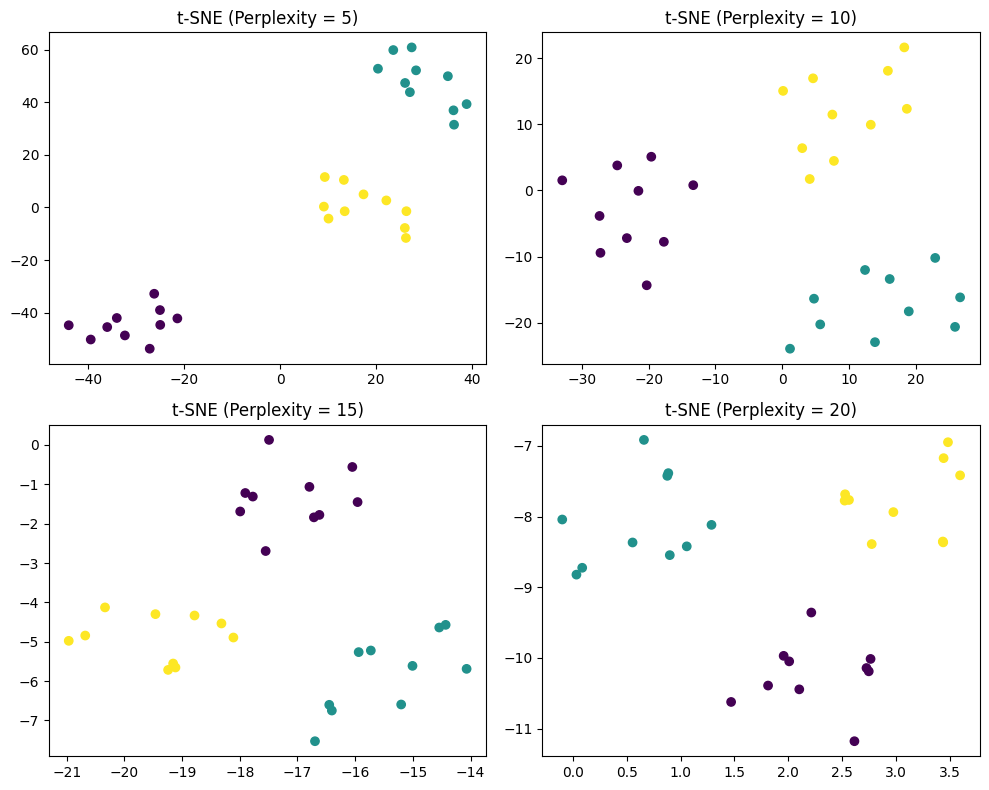

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# TODO: Implement TSNE (10%)
# [HINT] Use sk-learn tsne
# [HINT] Cat all the embedding from each categories together, and create a label list for them
# [HINT] Run TSNE and display the result

# Output the result as tsne_result, and labels as labels


dog_vision_embeddings = np.concatenate([embedding['vision'].cpu().numpy() for embedding in dog_embeddings])
car_vision_embeddings = np.concatenate([embedding['vision'].cpu().numpy() for embedding in car_embeddings])
bird_vision_embeddings = np.concatenate([embedding['vision'].cpu().numpy() for embedding in bird_embeddings])

all_embeddings = np.concatenate((dog_vision_embeddings, car_vision_embeddings, bird_vision_embeddings), axis=0)
labels = np.concatenate((np.zeros(10), np.ones(10), 2*np.ones(10)))

perplexities = [5, 10, 15, 20]

plt.figure(figsize=(10, 8))

# Loop through perplexity values
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    tsne_results = tsne.fit_transform(all_embeddings)

    # Create a subplot for each perplexity
    plt.subplot(2, 2, i + 1)
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
    plt.title(f't-SNE (Perplexity = {perplexity})')

plt.tight_layout()
plt.show()


## **3-2. Include the plots and discuss the outputs of t-SNE when using different numbers of perplexity. (10%)**

### 3-2. My Answer:

From the plots above, it can be easily find out that when the perpelexity goes lower, the data dots tend to be more tight in t-SNE and more focus cluster.

## **4-1. Implement PCA to visualize the embeddings. (10%)**

In [13]:
import numpy as np

class PCA:
    def __init__(self, n_components: int):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X: np.ndarray):
        # TODO: 10%
        # [Hint] Calculate covariance matrix and its eigenvalues and eigenvectors
        self.mean = np.mean(X, axis=0)
        centered_data = X - self.mean
        covariance_matrix = np.cov(centered_data, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X: np.ndarray) -> np.ndarray:
        # TODO: 5%
        # [Hint] Use the priciple components calculated in the previous method the project the transformed data
        centered_data = X - self.mean
        transformed_data = np.dot(centered_data, self.components)
        return transformed_data

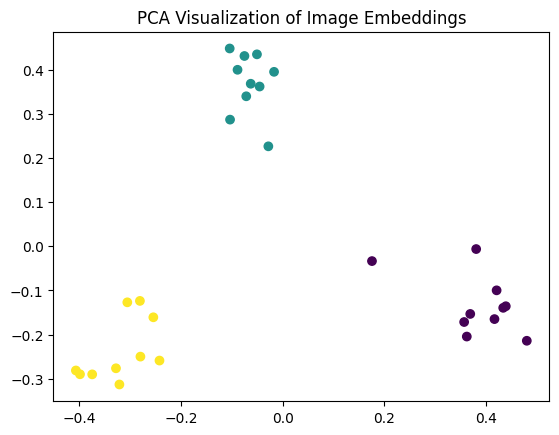

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# TODO: Implement PCA (10%)
# [HINT] Cat all the emnedding from each catafories together
# [HINT] Run PCA and display the result
pca = PCA(n_components=2)
pca.fit(all_embeddings)
pca_result = pca.transform(all_embeddings)
labels = np.concatenate((np.zeros(10), np.ones(10), 2*np.ones(10)))

# Output the result as pca_result, and labels as labels

# Plotting
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels)
plt.title('PCA Visualization of Image Embeddings')
plt.show()

## **4-2. Include the results of t-SNE and PCA, and discuss their difference. (10%)**

### 4-2. My Answer:

The differences between PCA and t-SNE are clearly shown in the images. PCA preserves the overall structure of the data, separating clusters distinctly but in a more linear and straightforward manner. On the other hand, t-SNE, depending on the perplexity setting, emphasizes local structures, creating tighter clusters, making it more effective for visualizing patterns in high-dimensional data. Therefore, PCA is better suited for simplifying data for analysis, while t-SNE excels at visualizing clusters and patterns.




## **5. Application of ImageBind (20%)**



### Please choose three similar pictures, and discribe the three pictures to your best respectively. Build the 3*3 matrix (softmax of inner product) and see how powerful ImageBind is able to generate the embeddings correctly.

Vision x Text:
tensor([[9.9999e-01, 2.2024e-06, 8.6839e-06],
        [1.9480e-08, 1.0000e+00, 6.7945e-10],
        [1.9652e-07, 6.9220e-03, 9.9308e-01]])
Dot Product Matrix:
           Dog       Car      Bird
Dog  32.882702 19.856756 21.228674
Car  15.314681 33.068565 11.958825
Bird  6.793504 17.262932 22.229034
Softmax Matrix:
          Dog      Car     Bird
Dog  0.999989 0.000002 0.000009
Car  0.000000 1.000000 0.000000
Bird 0.000000 0.006922 0.993078


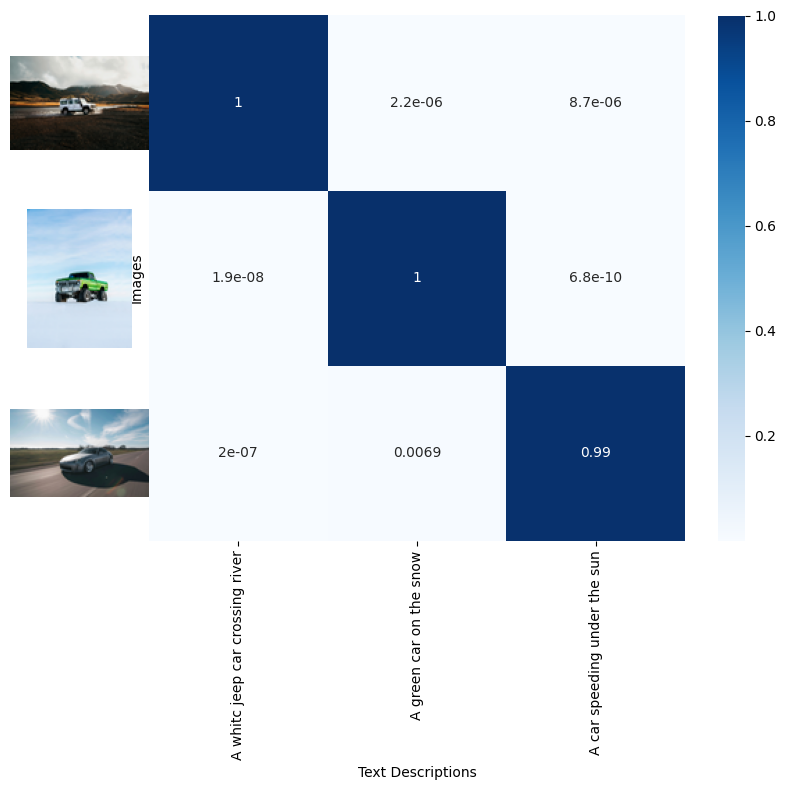

In [15]:
# Describe the pictures with your creativity!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


file_path = '/content/drive/MyDrive/AI_HW1/Car/'

# TODO: Choose one picture for each category and generates an embedding(5%)
# Please output the result as embeddings, like the sample code
image_paths=[ file_path+"/image_001.jpg", file_path+"/image_002.jpg", file_path+"/image_010.jpg"]
text_list = ["A whitc jeep car crossing river", "A green car on the snow", "A car speeding under the sun"]

inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

dot_product_matrix = embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T
softmax_matrix = torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1).cpu()

print("Vision x Text:")
print(softmax_matrix)

dot_product_pd = pd.DataFrame(dot_product_matrix.cpu().numpy(), index=row_labels, columns=column_labels)
softmax_matrix_pd = pd.DataFrame(softmax_matrix.cpu().numpy(), index=row_labels, columns=column_labels)

pd.options.display.float_format = '{:.6f}'.format

print("Dot Product Matrix:")
print(dot_product_pd)

print("Softmax Matrix:")
print(softmax_matrix_pd)

# plt.figure(figsize=(8, 6))
# sns.heatmap(softmax_matrix, annot=True, cmap='Blues', xticklabels=text_list, yticklabels=image_paths)

# plt.xlabel('Text Descriptions')
# plt.ylabel('Image Names')


# plt.show()

# 创建热图，但不使用 yticklabels
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(softmax_matrix, annot=True, cmap='Blues', xticklabels=text_list, yticklabels=[], ax=ax)

# 设置 x 轴和 y 轴标签
plt.xlabel('Text Descriptions')
plt.ylabel('Images')

# 加载图片并显示在 y 轴上
for i, img_path in enumerate(image_paths):
    # 加载图片
    img = Image.open(img_path)
    img.thumbnail((100, 100), Image.Resampling.LANCZOS)  # 缩小图片

    # 将图片转换为可以嵌入的格式
    imagebox = OffsetImage(img, zoom=1)  # zoom 控制图片大小

    # 设定图片嵌入的位置
    ab = AnnotationBbox(imagebox, (0, i + 0.5), frameon=False, xybox=(-50, 0), xycoords='data', boxcoords="offset points", pad=0.0)
    ax.add_artist(ab)

# 调整布局和显示
plt.tight_layout()
plt.show()

### 5. My Answer:
This matrix demonstrates how ImageBind correctly generates embeddings for vision and text inputs. By comparing three images (of a white jeep crossing a river, a green car on snow, and a car speeding under the sun) with their corresponding text descriptions, the system generates a dot product matrix and applies softmax to show the matching probabilities.
As we can see in the result matrix, the probability is mostly 99.9% up. These high probabilities confirm that ImageBind is highly effective at generating accurate embeddings between images and text descriptions.